# Download data and split train/test

In [1]:
from pyrecdp.datasets import ibm_fraud_detect

full_data = ibm_fraud_detect().to_pandas()
train_data = full_data[full_data['Year'] <= 2018]
train_data.to_csv("ibm_fraud_detect_train.csv", index = False)
test_data = full_data[full_data['Year'] > 2018]
test_data.to_csv("ibm_fraud_detect_test.csv", index = False)

# RecDP end to end pipeline

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
train_data = pd.read_csv("ibm_fraud_detect_train.csv")

In [2]:
from pyrecdp.autofe import FeatureWrangler, DataEstimator

data_pipeline = FeatureWrangler(dataset=train_data, label="Is Fraud?")

def train_test_splitter(df):
    test_sample = df[df['Year'] == 2018]
    train_sample = df[df['Year'] < 2018]
    return train_sample, test_sample

config = {
    'model_file': 'test_frauddetect.mdl',
    'metrics': 'auc', 
    'objective': 'binary', 
    'model_name': 'lightgbm',
    'train_test_splitter': train_test_splitter}
train_pipeline = DataEstimator(method = 'train', data_pipeline = data_pipeline, config = config)
transformed_data = train_pipeline.fit_transform('spark')

Will assign 48 cores and 308502 M memory for spark
23/03/31 22:47:52 WARN Utils: Your hostname, sr414 resolves to a loopback address: 127.0.1.1; using 10.1.2.14 instead (on interface enp134s0f1)
23/03/31 22:47:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/31 22:47:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
per core memory size is 6.276 GB and shuffle_disk maximum capacity is 8589934592.000 GB
{0: DataFrame, 1: type_infer, 2: fillna, 3: rename, 4: categorify, 5: DataFrame, 6: type_infer, 7: string_to_number, 8: astype, 9: fillna, 10: rename, 11: datetime_feature, 12: drop, 13: onehot_encode, 14: list_onehot_encode, 15: categorify, 16: rename, 17: drop, 18: DataFrame, 19: lightgbm}
execute with spark started ...
append DataFrame
append type_infer
append DataFrameToRDDConverter
DataframeConvert partition pandas dataframe to spark RDD took 16.292 secs
append fillna
append rename
append categorify
append RDDToDataFrameConverter


DataframeTransform took 18.881 secs, processed 22326462 rows with num_partitions as 200
DataframeTransform combine to one pandas dataframe took 3.349 secs
append DataFrame
append type_infer
append DataFrameToRDDConverter
DataframeConvert partition pandas dataframe to spark RDD took 17.212 secs
append string_to_number
append astype
append fillna
append rename
append datetime_feature
append drop
append onehot_encode
append RDDToDataFrameConverter


DataframeTransform took 19.233 secs, processed 22326462 rows with num_partitions as 200
DataframeTransform combine to one pandas dataframe took 2.878 secs
append list_onehot_encode
append categorify
append rename
append drop
append DataFrame
append lightgbm


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_w

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Number of positive: 25179, number of negative: 20579668
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.903451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16013
[LightGBM] [Info] Number of data points in the train set: 20604847, number of used features: 28


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001222 -> initscore=-6.706049
[LightGBM] [Info] Start training from score -6.706049
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.982105
execute with spark took 183.3055742122233 sec


In [3]:
train_pipeline.export('fraud_detect.json')

In [4]:
transformed_data

,User,Card,Year,Month,Day,Merchant_Name,Zip,MCC,Is_Fraud,Amount__string_to_number,Time__day,Time__month,Time__weekday,Time__year,Time__hour,Use_Chip__Chip_Transaction,Use_Chip__Online_Transaction,Use_Chip__Swipe_Transaction,Errors_Bad_CVV,Errors_Bad_Card_Number,Errors_Bad_Expiration,Errors_Bad_PIN,Errors_Bad_Zipcode,Errors_Insufficient_Balance,Errors_Technical_Glitch,Use_Chip__idx,Merchant_City__idx,Merchant_State__idx,Errors__idx
0,0,0,2002,9,1,3527213246127876953,91750.0,5300,0,134,31,3,4,2023,6,0,0,1,0,0,0,0,0,0,0,2,6226,29,0
1,0,0,2002,9,1,-727612092139916043,91754.0,5411,0,38,31,3,4,2023,6,0,0,1,0,0,0,0,0,0,0,2,7764,29,0
2,0,0,2002,9,2,-727612092139916043,91754.0,5411,0,120,31,3,4,2023,6,0,0,1,0,0,0,0,0,0,0,2,7764,29,0
3,0,0,2002,9,2,3414527459579106770,91754.0,5651,0,128,31,3,4,2023,17,0,0,1,0,0,0,0,0,0,0,2,7764,29,0
4,0,0,2002,9,3,5817218446178736267,91750.0,5912,0,104,31,3,4,2023,6,0,0,1,0,0,0,0,0,0,0,2,6226,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326457,1999,1,2018,12,30,-3345936507911876459,3102.0,7538,0,50,31,3,4,2023,11,1,0,0,0,0,0,0,0,0,0,0,7055,135,0
22326458,1999,1,2018,12,30,-5841929396161652653,-1.0,4121,0,46,31,3,4,2023,20,0,1,0,0,0,0,0,0,0,0,1,0,0,0
22326459,1999,1,2018,12,31,-7421093378627544099,-1.0,5311,0,5,31,3,4,2023,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
22326460,1999,1,2018,12,31,2910328604019547969,3055.0,7538,0,77,31,3,4,2023,11,1,0,0,0,0,0,0,0,0,0,0,7579,135,0


# View Pipeline

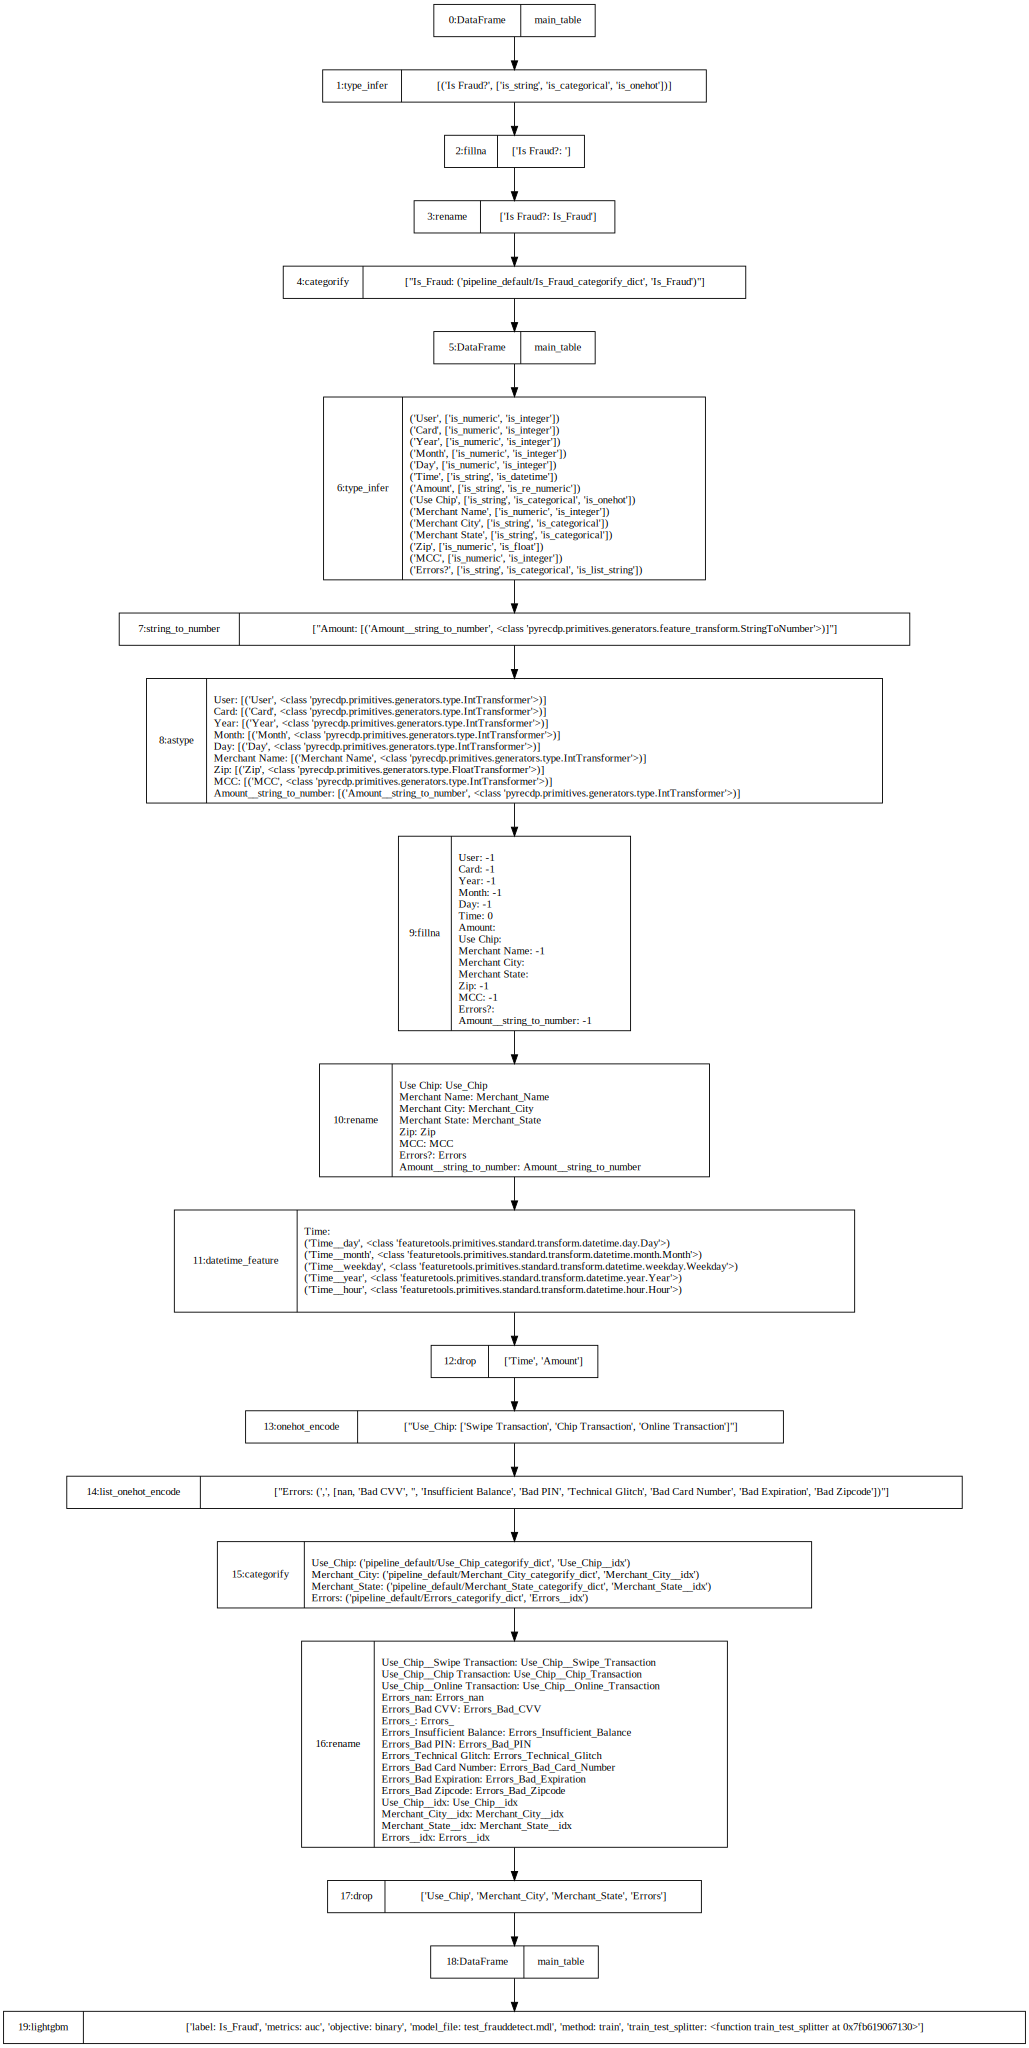

In [5]:
train_pipeline.plot()

In [7]:
! cat fraud_detect.json

{
    "0": {
        "children": null,
        "op": "DataFrame",
        "config": "main_table"
    },
    "1": {
        "children": [
            0
        ],
        "op": "type_infer",
        "config": [
            [
                "Is Fraud?",
                [
                    "is_string",
                    "is_categorical",
                    "is_onehot"
                ]
            ]
        ]
    },
    "2": {
        "children": [
            1
        ],
        "op": "fillna",
        "config": {
            "Is Fraud?": ""
        }
    },
    "3": {
        "children": [
            2
        ],
        "op": "rename",
        "config": {
            "Is Fraud?": "Is_Fraud"
        }
    },
    "4": {
        "children": [
            3
        ],
        "op": "categorify",
        "config": {
            "Is_Fraud": [
                "pipeline_default/Is_Fraud_categorify_dict",
                "Is_Fraud"
            ]
        }
    },
    "5": {
        "chil